In [1]:
from Geometry3D import *
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import math
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Fracture unit normal Vector

Let $P_{1}$, $P_{2}$ and $P_{3}$ be non collinear vectices belonging to the fracture plane:

\begin{aligned}
\ P_{1} &= (P_{1x}, P_{1y}, P_{1z}) \\ \\
\ P_{2} &= (P_{2x}, P_{2y}, P_{2z}) \\ \\
\ P_{3} &= (P_{3x}, P_{3y}, P_{3z}) \\ \\

\end{aligned}

Using these, it is possible then to construct two non- parallel vectors lying on the plane by taking the differences between the coordinates of these points:

\begin{aligned}
\vec{a} &= \vec{P_{1}P_{2}} = (P_{1x} - P_{2x}, P_{1y} - P_{2y}, P_{1z} - P_{2z}) \\ \\
\vec{b} &= \vec{P_{1}P_{3}} = (P_{1x} - P_{3x}, P_{1y} - P_{3y}, P_{1z} - P_{3z}) \\ \\
\vec{a} &= (a_1, a_2, a_3) \\ \\
\vec{b} &= (b_1, b_2, b_3) \\ \\


\end{aligned}

Once the two vectors are constructed, it is possible to compute the cross product between these two to get the normal vector $\vec{n}$ of the plane. The cross product of two vectors, returns a vector which is perpendicular to the two vector used to calculate it


\begin{aligned}

\vec{n} &= \vec{a}  \times  \vec{b} \\ \\

\vec{n} &= \begin{bmatrix}


a_2b_3 - a_3b_2 \\ \\
a_3b_1 - a_1b_3 \\ \\
a_1b_2 - a_2b_1
\end{bmatrix}\\

\ n &= \frac{\vec{n}} {\|\vec{n}\|}\quad \\
\ n &= \frac{\vec{n}} {\sqrt{\vec{n_{x}}^2 + \vec{n_{y}}^2 + \vec{n_{z}}^2}}\quad
\end{aligned}

Being ${n}$ the unit vector of ${\vec{n}}$

- Direction

The direccion of the normal vector $\vec{n}$ is described by the polar ($\theta$)  and azimuthal ($\phi$) angles, where:

On the one hand: 
\begin{aligned}
\cos{\theta} &= \frac{{n} \cdot  \hat{\textbf{k}} }{\|{n}\|}\quad   \cdot \frac{ 180°}{\pi}\quad
\end{aligned}

Where $\hat{\textbf{k}}$ represents the unit vector along the positive z-axis in 3D Cartesian coordinates

\begin{aligned}
\cos{\theta} &= \frac{ (0) \cdot (n_{x}) +  (0) \cdot (n_{y}) + (1) \cdot (n_{z}) }{\sqrt{n_{x}^2 + n_{y}^2 + n_{z}^2}}\quad  \cdot \frac{ 180°}{\pi}\quad \\
\ {\theta} &= arccos \left(\frac{ n_{z}}{\sqrt{n_{x}^2 + n_{y}^2 + n_{z}^2}}\quad \right) \cdot \frac{ 180°}{\pi}\quad
\end{aligned}

On the other hand, $\phi$ can by calculated using the ${x}$ and ${y}$ compnentes of the proejcted normal vector:
\begin{aligned}
\ {\phi} &= atan2(n_{y}, n_{x}) \cdot \frac{ 180°}{\pi}\quad
\end{aligned}


Vector components

\begin{equation}
  \mathbf{n_{i}n_{j}} = \begin{pmatrix}
                  n_{x}^2    & n_{x}n_{y} & n_{x}n_{z} \\
                  n_{y}n_{x} & n_{y}^2    & n_{y}n_{z} \\
                  n_{z}n_{x} & n_{z}n_{y} & n_{z}^2 
                \end{pmatrix}
\end{equation}

\begin{equation}
  \mathbf{n_{i}n_{j}} = 
      \begin{pmatrix}
        {sin}^2(\theta){cos}^2(\phi)           & {sin}^2(\theta){cos}(\phi){sin}(\phi)  &  {sin}(\theta){cos}(\theta){cos}(\phi)\\
        {sin}^2(\theta){cos}(\phi){sin}(\phi)  & {sin}^2(\theta){sin}^2(\phi)           &  {sin}(\theta){cos}(\theta){sin}(\phi)\\
        {sin}(\theta){cos}(\theta){cos}(\phi)    & {sin}(\theta){cos}(\theta){sin}(\phi)    & {cos}^2(\theta) 
      \end{pmatrix}
\end{equation}

In [2]:
a1 = Point(0,-2,-2)
b1 = Point(0,-2,2)
c1 = Point(0,2,2)
d1 = Point(0,2,-2)

In [3]:
#Boundig box 
# define the vertices of the box
a = Point(1,1,1)
b = Point(-1,1,1)
c = Point(-1,-1,1)
d = Point(1,-1,1)
e = Point(1,1,-1)
f = Point(-1,1,-1)
g = Point(-1,-1,-1)
h = Point(1,-1,-1)

# Create the planes constraning the box
face0 = ConvexPolygon((a,d,h,e))
face1 = ConvexPolygon((a,e,f,b))
face2 = ConvexPolygon((c,b,f,g))
face3 = ConvexPolygon((c,g,h,d))
face4 = ConvexPolygon((a,b,c,d))
face5 = ConvexPolygon((e,h,g,f))
bounding_box = ConvexPolyhedron((face0,face1,face2,face3,face4,face5))

# Create intersecting plane  # horizontal plane intersecting the middle of the volume
a1 = Point(-2,-2,0)
b1 = Point(2,-2,0)
c1 = Point(2,2,0)
d1 = Point(-2,2,0)
plane = ConvexPolygon((a1,b1,c1, d1))

intersected_area = intersection(bounding_box,plane)

(-2.0, 2.0)

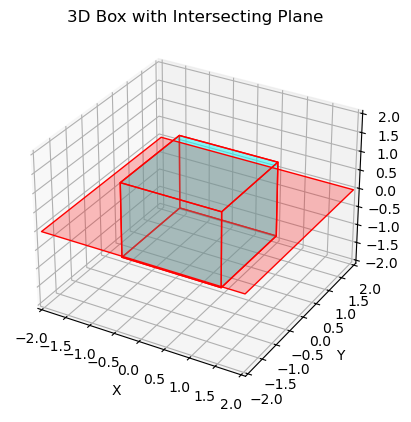

In [4]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Define the vertices of the box

vertices_box = []
for face in bounding_box.convex_polygons:
    coordinates = [[point.x, point.y, point.z] for point in face.points]
    vertices_box.append(coordinates)

# Define the vertices of the intersecting plane


vertices_plane = [[[point.x, point.y, point.z] for point in plane.points]]
# vertices_plane.append(coordinates_plane)


# Plot the faces of the box
ax.add_collection3d(Poly3DCollection(vertices_box, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))
ax.add_collection3d(Poly3DCollection(vertices_plane, facecolors='red', linewidths=1, edgecolors='r', alpha=.25))

vertices_box = np.array(vertices_box)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Box with Intersecting Plane')

# Set the limits for the axes
ax.set_xlim( [vertices_box[:, :, 0].min()-1, vertices_box[:, :, 0].max()+1])
ax.set_ylim( [vertices_box[:, :, 0].min()-1, vertices_box[:, :, 0].max()+1])
ax.set_zlim( [vertices_box[:, :, 0].min()-1, vertices_box[:, :, 0].max()+1])


# Show the plot


In [5]:
p1,p2, p3 = plane.points[:3]
a = np.array([p1.x - p2.x, p1.y - p2.y, p1.z - p2.z])
b = np.array([p1.x - p3.x, p1.y - p3.y, p1.z - p3.z])
n = np.array([a[1]*b[2] - a[2]*b[1], a[2]*b[0]- a[0]*b[2], a[0]*b[1]-a[1]*b[0]])
n = n /np.sqrt(np.sum(n**2))

theta = np.arccos(n[2]) * 180 / np.pi
phi = np.arctan2(n[1], n[0]) * 180 / np.pi

sin_x = np.sin(theta)
sin2_x = np.sin(theta) ** 2

cos_x = np.cos(theta)
cos2_x = np.cos(theta) ** 2

sin_y = np.sin(phi)
sin2_y = np.sin(phi) ** 2

cos_y = np.cos(phi)
cos2_y = np.cos(phi) ** 2

nn = np.array([[sin2_x*cos2_y, sin2_x*cos_y*sin_y, sin_x*cos_x*cos_y],
               [sin2_x*cos_y*sin_y, sin2_x*sin2_y, sin_x*cos_x*sin_y],
               [sin_x*cos_x*cos_y, sin_x*cos_x*sin_y, cos2_y]])

# Permeability tensor

\begin{aligned}
\\k_{ij} &= \lambda \left( F_{kk} \delta_{ij} - F_{ij} \right)
\end{aligned}

Where:
- $\lambda$ is a dimensionless constant increasing with the fracture size with 0 $\leq$ $\lambda$ $\leq$ 1/12
- $\delta_{ij}$ is the Kronecker delta
- $F_{kk} = F_{11} + F_{22} + F_{33}$

\begin{aligned}
F_{ij} = \frac{{1}} {V} \sum_{k=1}^{N} A_{k}T_{k}n_{ik}n_{jk} 
\end{aligned}

Where: 
- ${V}$ Cell volumn
- $A_{k}$ Area of the fracture k
- $T_{k}$ Transmissivity of fracture k
- $n_{ik}n_{jk} $ Components of the unit normal vector of k

In [6]:
nn

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.]])

In [7]:
volume = round(bounding_box.volume(), 1)
area = round(intersected_area.area(), 1)   # intersected area of the plane (fracture) and the cell
transmisivity = 1

F_ij = area*transmisivity*nn / volume

kronecker_delta = np.identity(3)
F_kk = np.sum(np.diagonal(F_ij))

k_ij = (F_kk * kronecker_delta) - F_ij

# Convert permeability to Hydraulic conductivity

\begin{aligned}
\text{Hydraulic conductivity} (K) = \frac{{Transmisivity  (T)}} {b} 
\end{aligned}

Where:

- ${b}$ is a vector containing the lenght (thickness) along the ${x,y,z}$ axes


In [8]:
# Dimensions of the block in meters
lenght = 2
width = 2
thickness = 2

# Create the hydraulic conductivity tensor
b = np.array([lenght, width, thickness])

K = k_ij / b
K

array([[0.25, 0.  , 0.  ],
       [0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  ]])

In theory, this array above shows the hydraulic conductivity to set in the feflow model. This makes sense, since the plane was in the horizontal direction, i have non- zero components in ${x}$ and ${y}$.

But it raises the questions, i am dividing the transmissivity by the dimensions of the bounding box, assuming the flow direction is parallel to the dimension of the box. but if that is not the case (which it´s the most likely), im not sure how to handle that 

In [ ]:
theta_radians = np.radians(theta)
phi_radians = np.radians(phi)
v=1
# Calculate components
v_x = v * np.sin(phi_radians) * np.cos(theta_radians)
v_y = v * np.sin(phi_radians) * np.sin(theta_radians)
v_z = v * np.cos(phi_radians)
print(v_x,v_y,v_z)

In [ ]:
x_coords = []
y_coords = []
z_coords = []
for point in [a1,b1,c1,d1]:
    i,j,k = point
    x_coords.append(i)
    y_coords.append(j)
    z_coords.append(k)
fig = go.Figure(data=[go.Scatter3d(
    x=x_coords,
    y=y_coords,
    z=z_coords,
    mode='markers')])
fig.show()